# Data Preprocessing

## Dataset Aggregation
Stratified sampling to ensure generalisation of dataset classes, as there could potentially be some datasets that are heavy LOS / NLOS. Performing this has now ensured that the dataset is evenly balanced for preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from utils import *

# Load the dataset
df1 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part1.csv')
df2 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part2.csv')
df3 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part3.csv')
df4 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part4.csv')
df5 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part5.csv')
df6 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part6.csv')
df7 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part7.csv')

# Consolidating the datasets into a single DataFrame
df = pd.concat([df1, df2, df3, df4, df5, df6, df7])

full_training = []
full_testing = []

# Stratified sampling based on 'NLOS' column iterate through EACH df INDIVIDUALLY! (70/30 split)
for x in range (1,8):
    train, test = train_test_split(locals()[f'df{x}'], test_size=0.3, stratify=locals()[f'df{x}']['NLOS'], random_state=42)
    full_training.append(train)
    full_testing.append(test)


# Concatenate the training and testing DataFrames
df_training = pd.concat(full_training)
df_testing = pd.concat(full_testing)

# Combine everything back together
df_combined_original = pd.concat([df_training, df_testing])

# Display the combined DataFrame
df_combined_original.reset_index(drop=True, inplace=True)
df_combined_original

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,...,408.0,713.0,446.0,273.0,340.0,494.0,378.0,546.0,30.0,256.0
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,...,224.0,31.0,62.0,267.0,102.0,359.0,156.0,132.0,79.0,0.0
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,...,250.0,419.0,311.0,185.0,274.0,258.0,212.0,305.0,56.0,256.0
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,...,318.0,191.0,58.0,276.0,249.0,298.0,64.0,100.0,112.0,0.0
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,...,272.0,129.0,264.0,77.0,104.0,313.0,234.0,74.0,165.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,...,198.0,335.0,291.0,138.0,176.0,224.0,210.0,205.0,289.0,0.0
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,...,1176.0,341.0,314.0,445.0,332.0,1000.0,1337.0,304.0,922.0,256.0
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,...,219.0,246.0,71.0,374.0,183.0,16.0,160.0,266.0,269.0,256.0
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,...,171.0,182.0,177.0,74.0,278.0,204.0,150.0,181.0,145.0,0.0


## Exploratory Data Analysis

### Preview Data

In [2]:
print("Dataset Features (excluding 1000+ CIR columns)")
df_combined_original[['NLOS', 'RANGE', 'FP_IDX', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'STDEV_NOISE', 'CIR_PWR', 'MAX_NOISE', 'RXPACC', 'CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR']]

Dataset Features (excluding 1000+ CIR columns)


,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,2.0,27.0,1024.0,110.0,64.0
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,2.0,27.0,1024.0,110.0,64.0
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,2.0,39.0,1024.0,110.0,64.0
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,2.0,39.0,1024.0,110.0,64.0
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,2.0,27.0,1024.0,110.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,2.0,39.0,1024.0,110.0,64.0
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,2.0,39.0,1024.0,110.0,64.0
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,2.0,27.0,1024.0,110.0,64.0
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,2.0,39.0,1024.0,110.0,64.0


### Check for any missing or null values
Upon analysis, there does not seem to be any missing values

In [3]:
# Check for missing values in each column across the whole dataset, if there are any missing values, return True
missing_values = df_combined_original.isnull().isna().any().any()
missing_values

False

### Check for any duplicated data
Upon analysis, there does not seem to be any duplicated rows

In [4]:
# Check for duplicated rows
df_combined_original[df_combined_original.duplicated()].shape[0]

0

### Find features with single-values only 
- `CH` (Channel Number, consists of single value 2.0)
- `BITRATE` (Bitrate, consists of single value 110.0)
- `PRFR` (Pulse Repetition Frequency, consists of single value 64.0, used to indicate value of constant A in calculations for `RX_POWER` and `FP_POWER`)

In [5]:
list_single_value_features = []
for column in df_combined_original.columns:
    if(len(df_combined_original[column].value_counts()) == 1):
        list_single_value_features.append(column)
list_single_value_features

['CH', 'BITRATE', 'PRFR']

In [6]:
for column in list_single_value_features:
    print(df_combined_original[column].value_counts(), end="\n\n")

CH
2.0    42000
Name: count, dtype: int64

BITRATE
110.0    42000
Name: count, dtype: int64

PRFR
64.0    42000
Name: count, dtype: int64



## Feature Engineering
- Create `FP_POWER`, `RX_POWER`, `D_POWER`, `D_POWER_LOS`, `D_POWER_NLOS` features

In [7]:
# Create a copy of the original dataframe before moving on
df_combined_copy = df_combined_original.copy()

### Feature Creation
Create `FP_POWER` (First Path Power Level), `RX_POWER` (Receive Signal Power Level) and `D_POWER` (Difference between `FP_POWER` and `RX_POWER`) features. Based on Section 4.7 of the Decawave DWM1000 Radio Module's [manual](https://thetoolchain.com/mirror/dw1000/dw1000_user_manual_v2.05.pdf).

#### Compute the First Path Power Level `FP_POWER`
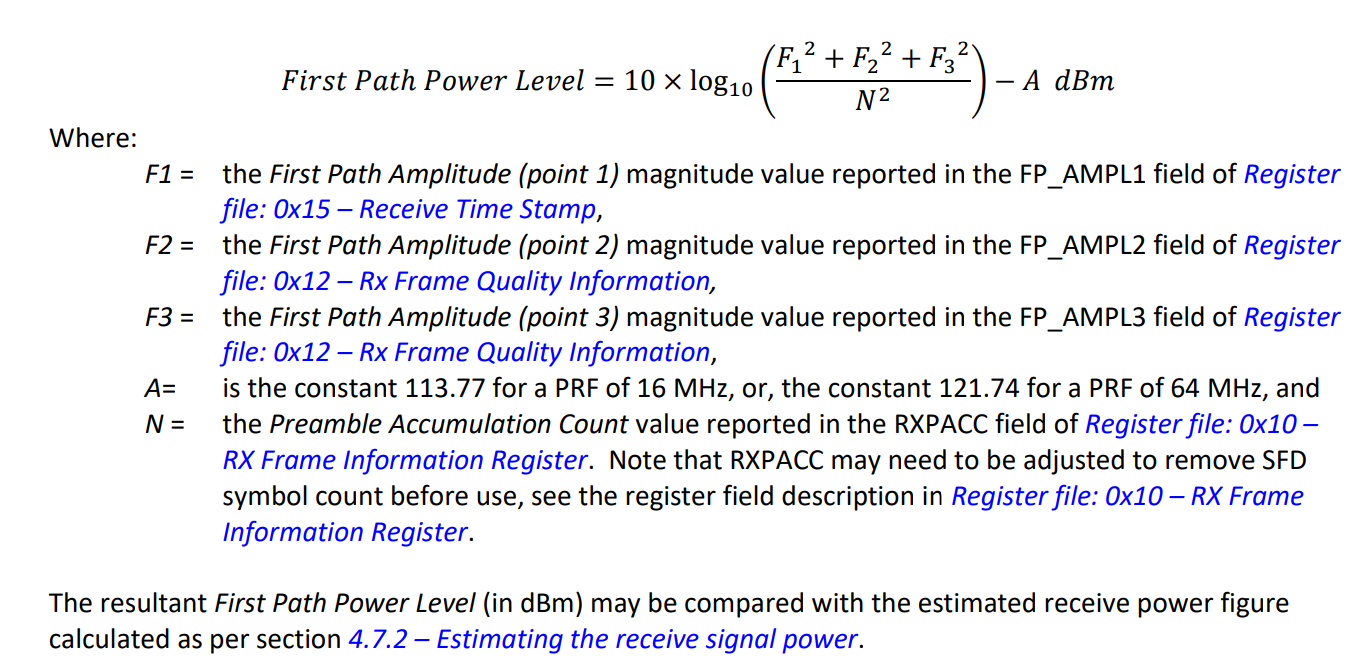

- $F_1$: `FP_AMP1` (first path amplitude - part1) [look in user manual](http://thetoolchain.com/mirror/dw1000/dw1000_user_manual_v2.05.pdf)
- $F_2$: `FP_AMP2` (first path amplitude - part2) [look in user manual](http://thetoolchain.com/mirror/dw1000/dw1000_user_manual_v2.05.pdf)
- $F_3$: `FP_AMP3` (first path amplitude - part3) [look in user manual](http://thetoolchain.com/mirror/dw1000/dw1000_user_manual_v2.05.pdf)
- $N$: `RXPACC` (received RX preamble symbols)
- $A$: 121.74 (constant value for `PRFR` of 64MHz)

In [8]:
# Define value of constant A, based on pulse repetition frequency rate
constant_a = 121.74 if df_combined_original['PRFR'][0] == 64.0 else 113.77 if df_combined_original['PRFR'][0] == 16.0 else 0

# Initialise FP_POWER
df_combined_copy['FP_POWER'] = 0.0

# Compute numerator and denominator
numerator = (df_combined_copy['FP_AMP1']**2) + (df_combined_copy['FP_AMP2']**2) + (df_combined_copy['FP_AMP3']**2)
denominator = df_combined_copy['RXPACC']**2

# Compute FP_POWER (First Path Power Level), ensuring that the numerator is not 0 to prevent log10(0) error
df_combined_copy.loc[numerator != 0.0, 'FP_POWER'] = 10 * np.log10(numerator / denominator) - constant_a
df_combined_copy

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015,FP_POWER
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,...,713.0,446.0,273.0,340.0,494.0,378.0,546.0,30.0,256.0,-94.596003
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,...,31.0,62.0,267.0,102.0,359.0,156.0,132.0,79.0,0.0,-82.200844
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,...,419.0,311.0,185.0,274.0,258.0,212.0,305.0,56.0,256.0,-81.821606
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,...,191.0,58.0,276.0,249.0,298.0,64.0,100.0,112.0,0.0,-82.833613
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,...,129.0,264.0,77.0,104.0,313.0,234.0,74.0,165.0,0.0,-86.455578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,...,335.0,291.0,138.0,176.0,224.0,210.0,205.0,289.0,0.0,-109.446217
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,...,341.0,314.0,445.0,332.0,1000.0,1337.0,304.0,922.0,256.0,-103.265570
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,...,246.0,71.0,374.0,183.0,16.0,160.0,266.0,269.0,256.0,-93.474549
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,...,182.0,177.0,74.0,278.0,204.0,150.0,181.0,145.0,0.0,-114.306118


In [9]:
# Check for records with zero FP_POWER
df_combined_copy[df_combined_copy['FP_POWER'] == 0]

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015,FP_POWER


#### Compute the Receive Signal Power Level `RX_POWER`
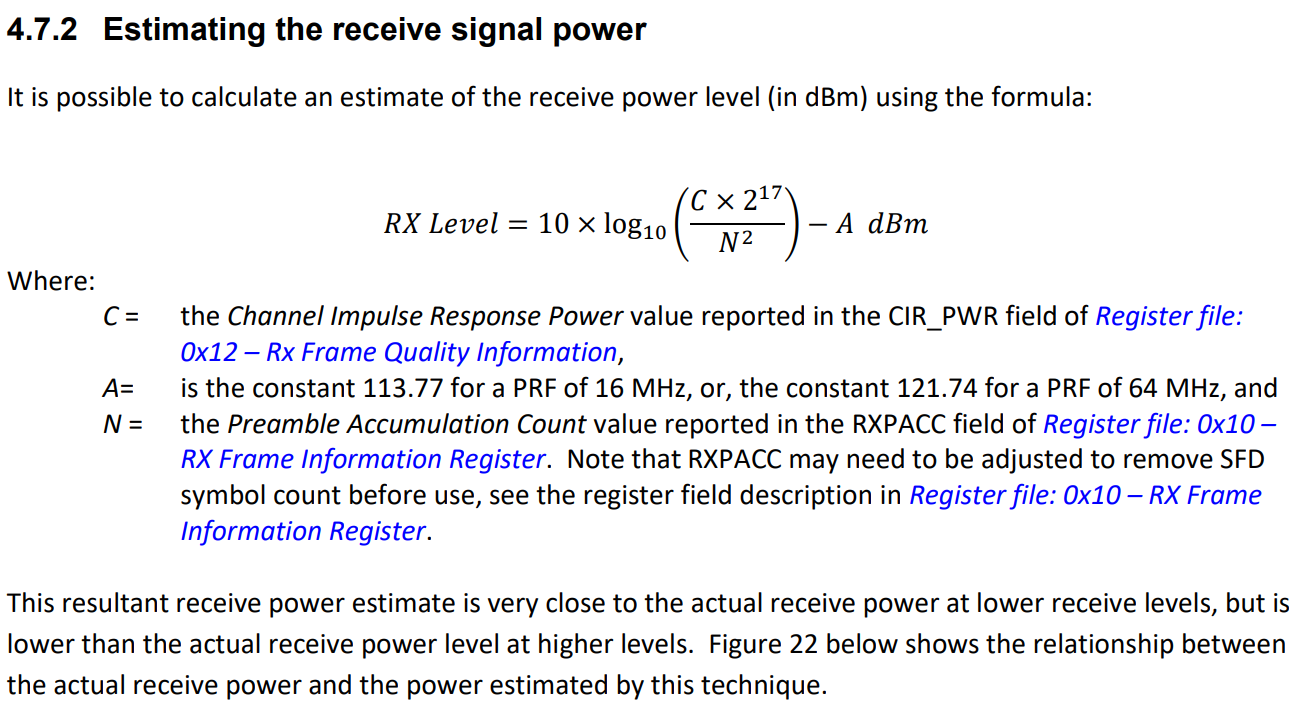

- $C$: `CIR_PWR` (total channel impulse response power)
- $N$: `RXPACC` (received RX preamble symbols)
- $A$: 121.74 (constant value for `PRFR` of 64MHz)

In [10]:
# Define value of constant A, based on pulse repetition frequency rate
constant_a = 121.74 if df_combined_original['PRFR'][0] == 64.0 else 113.77 if df_combined_original['PRFR'][0] == 16.0 else 0

# Initialise RX_POWER
df_combined_copy['RX_POWER'] = 0.0

# Compute numerator and denominator
numerator = df_combined_copy['CIR_PWR'] * (2**17)
denominator = df_combined_copy['RXPACC']**2

# Compute RX_POWER (Receive Signal Power Level), ensuring that the numerator is not 0 to prevent log10(0) error (RuntimeWarning will still be present)
df_combined_copy.loc[numerator != 0.0, 'RX_POWER'] = 10 * np.log10(numerator / denominator) - constant_a
df_combined_copy

/Users/peter/Desktop/Codebase/Assignments/DA/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015,FP_POWER,RX_POWER
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,...,446.0,273.0,340.0,494.0,378.0,546.0,30.0,256.0,-94.596003,-83.242593
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,...,62.0,267.0,102.0,359.0,156.0,132.0,79.0,0.0,-82.200844,-78.924940
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,...,311.0,185.0,274.0,258.0,212.0,305.0,56.0,256.0,-81.821606,-78.433506
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,...,58.0,276.0,249.0,298.0,64.0,100.0,112.0,0.0,-82.833613,-78.878945
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,...,264.0,77.0,104.0,313.0,234.0,74.0,165.0,0.0,-86.455578,-82.764816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,...,291.0,138.0,176.0,224.0,210.0,205.0,289.0,0.0,-109.446217,-94.681363
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,...,314.0,445.0,332.0,1000.0,1337.0,304.0,922.0,256.0,-103.265570,-88.436032
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,...,71.0,374.0,183.0,16.0,160.0,266.0,269.0,256.0,-93.474549,-81.707347
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,...,177.0,74.0,278.0,204.0,150.0,181.0,145.0,0.0,-114.306118,-87.757599


In [11]:
# Check for records with zero RX_POWER
df_combined_copy[df_combined_copy['RX_POWER'] == 0]

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015,FP_POWER,RX_POWER
2261,1.0,7.02,757.0,30.0,214.0,413.0,36.0,0.0,412.0,192.0,...,190.0,292.0,271.0,239.0,210.0,260.0,223.0,256.0,-114.036127,0.0
16288,1.0,4.88,739.0,112.0,323.0,227.0,40.0,0.0,322.0,128.0,...,295.0,242.0,279.0,67.0,153.0,177.0,159.0,0.0,-111.620727,0.0
24651,1.0,6.33,747.0,293.0,311.0,187.0,28.0,0.0,310.0,160.0,...,246.0,353.0,196.0,38.0,228.0,42.0,173.0,0.0,-112.447028,0.0


#### Compute the difference between `FP_POWER` and `RX_POWER` (`D_POWER`)
$D$: `RX_POWER` - `FP_POWER`

In [12]:
# Compute D_POWER (difference between FP_POWER and RX_POWER)
df_combined_copy['D_POWER'] = df_combined_copy['RX_POWER'] - df_combined_copy['FP_POWER']
df_combined_copy

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015,FP_POWER,RX_POWER,D_POWER
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,...,273.0,340.0,494.0,378.0,546.0,30.0,256.0,-94.596003,-83.242593,11.353411
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,...,267.0,102.0,359.0,156.0,132.0,79.0,0.0,-82.200844,-78.924940,3.275904
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,...,185.0,274.0,258.0,212.0,305.0,56.0,256.0,-81.821606,-78.433506,3.388100
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,...,276.0,249.0,298.0,64.0,100.0,112.0,0.0,-82.833613,-78.878945,3.954668
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,...,77.0,104.0,313.0,234.0,74.0,165.0,0.0,-86.455578,-82.764816,3.690762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,...,138.0,176.0,224.0,210.0,205.0,289.0,0.0,-109.446217,-94.681363,14.764854
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,...,445.0,332.0,1000.0,1337.0,304.0,922.0,256.0,-103.265570,-88.436032,14.829538
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,...,374.0,183.0,16.0,160.0,266.0,269.0,256.0,-93.474549,-81.707347,11.767202
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,...,74.0,278.0,204.0,150.0,181.0,145.0,0.0,-114.306118,-87.757599,26.548519


### Check NLOS/LOS class of dataset, based on their `D_POWER` values (reference to Section 4.7 of the Decawave DWM1000 Radio Module's [manual](https://thetoolchain.com/mirror/dw1000/dw1000_user_manual_v2.05.pdf))
Analysis of the class values

In [13]:
# If D_POWER < 6dB, LOS
print("D_POWER < 6dB (Supposed to be LOS)")
# print(df_combined_copy[df_combined_copy['D_POWER'] < 6.0]['NLOS'].value_counts())
print({label: f"{count} ({(count / len(df_combined_copy[df_combined_copy['D_POWER'] < 6.0]['NLOS']) * 100):.2f}%)" for label, count in df_combined_copy[df_combined_copy['D_POWER'] < 6.0]['NLOS'].value_counts().items()})

# If D_POWER > 10dB, NLOS
print("\nD_POWER > 10dB (Supposed to be NLOS)")
# print(df_combined_copy[df_combined_copy['D_POWER'] > 10.0]['NLOS'].value_counts())
print({label: f"{count} ({(count / len(df_combined_copy[df_combined_copy['D_POWER'] > 10.0]['NLOS']) * 100):.2f}%)" for label, count in df_combined_copy[df_combined_copy['D_POWER'] > 10.0]['NLOS'].value_counts().items()})

D_POWER < 6dB (Supposed to be LOS)


{0.0: '14910 (66.00%)', 1.0: '7682 (34.00%)'}

D_POWER > 10dB (Supposed to be NLOS)
{1.0: '8125 (80.52%)', 0.0: '1966 (19.48%)'}


In [14]:
# Create one-hot columns based on the D_POWER thresholds
df_combined_copy['D_POWER_LOS'] = (df_combined_copy['D_POWER'] < 6.0).astype(int)
df_combined_copy['D_POWER_NLOS'] = (df_combined_copy['D_POWER'] > 10.0).astype(int)
df_combined_copy

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015,FP_POWER,RX_POWER,D_POWER,D_POWER_LOS,D_POWER_NLOS
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,...,494.0,378.0,546.0,30.0,256.0,-94.596003,-83.242593,11.353411,0,1
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,...,359.0,156.0,132.0,79.0,0.0,-82.200844,-78.924940,3.275904,1,0
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,...,258.0,212.0,305.0,56.0,256.0,-81.821606,-78.433506,3.388100,1,0
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,...,298.0,64.0,100.0,112.0,0.0,-82.833613,-78.878945,3.954668,1,0
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,...,313.0,234.0,74.0,165.0,0.0,-86.455578,-82.764816,3.690762,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,...,224.0,210.0,205.0,289.0,0.0,-109.446217,-94.681363,14.764854,0,1
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,...,1000.0,1337.0,304.0,922.0,256.0,-103.265570,-88.436032,14.829538,0,1
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,...,16.0,160.0,266.0,269.0,256.0,-93.474549,-81.707347,11.767202,0,1
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,...,204.0,150.0,181.0,145.0,0.0,-114.306118,-87.757599,26.548519,0,1


## Dataset Subsetting

- Non-CIR Dataset (Dataset without 1000+ CIR columns)
    - Features used to obtain derived features `FP_POWER`, `RX_POWER` and `D_POWER` are removed

- Non-CIR-Trimmed Dataset (Dataset without 1000+ CIR columns, and with unimportant features removed)
    - Features used to obtain derived features `FP_POWER`, `RX_POWER` and `D_POWER` are removed
    - Unimportant features are removed

- CIR Dataset (Dataset that only consists of 1000+ CIR columns)
    - CIR features are re-engineered into their descriptive statistical values (mean, variance etc)

- Dataset Variants
    - `DATASET_1`: Non-CIR + CIR
    - `DATASET_2`: Non-CIR + PCA(CIR)
    - `DATASET_3`: PCA(Non-CIR + CIR)
    - `DATASET_4`: PCA(Non-CIR + PCA(CIR))
    - `DATASET_5`: Non-CIR-Trimmed + CIR
    - `DATASET_6`: Non-CIR-Trimmed + PCA(CIR)
    - `DATASET_7`: PCA(Non-CIR-Trimmed + CIR)
    - `DATASET_8`: PCA(Non-CIR-Trimmed + PCA(CIR))

**`DATASET_3`, `DATASET_4`, `DATASET_7` and `DATASET_8` may not be relevant!*

### Data Subset: Non-CIR Dataset

In [15]:
# Build non-CIR dataset (first 15 features of original dataset, and last 5 derived features of the dataset's copy)
df_non_cir = pd.concat([df_combined_original.iloc[:, :15], df_combined_copy.iloc[:, -5:]], axis=1)

# Remove attributes used to compute derived features, and single-valued attributes (CH, BITRATE, PRFR)
df_non_cir.drop(columns=['FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'RXPACC', 'CIR_PWR', 'CH', 'BITRATE', 'PRFR'], inplace=True)
df_non_cir

,NLOS,RANGE,FP_IDX,STDEV_NOISE,MAX_NOISE,FRAME_LEN,PREAM_LEN,FP_POWER,RX_POWER,D_POWER,D_POWER_LOS,D_POWER_NLOS
0,0.0,4.88,744.0,108.0,1645.0,27.0,1024.0,-94.596003,-83.242593,11.353411,0,1
1,0.0,0.97,746.0,48.0,1189.0,27.0,1024.0,-82.200844,-78.924940,3.275904,1,0
2,0.0,1.07,745.0,116.0,3111.0,39.0,1024.0,-81.821606,-78.433506,3.388100,1,0
3,0.0,0.90,751.0,60.0,1414.0,39.0,1024.0,-82.833613,-78.878945,3.954668,1,0
4,0.0,2.79,744.0,44.0,743.0,27.0,1024.0,-86.455578,-82.764816,3.690762,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,80.0,1188.0,39.0,1024.0,-109.446217,-94.681363,14.764854,0,1
41996,1.0,2.25,744.0,204.0,3126.0,39.0,1024.0,-103.265570,-88.436032,14.829538,0,1
41997,0.0,2.48,750.0,72.0,1068.0,27.0,1024.0,-93.474549,-81.707347,11.767202,0,1
41998,1.0,6.87,738.0,72.0,1071.0,39.0,1024.0,-114.306118,-87.757599,26.548519,0,1


### Exploratory Data Analysis: Non-CIR Dataset
- Perform scaling to shift data values to adjust differences among attributes in terms of frequency of occurrence, mean, variance, range
- Identification of unimportant features to be removed to derive `Non-CIR-Trimmed` dataset
    - Plot histogram to check for skewed data, if data is very similarly normally distributed it's not the best, as you can find greater differences in skewed data.

#### Scaling of Non-CIR dataset

In [16]:
# Min-Max Scaling (shift and rescale data values so they are within the range of [0, 1])
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale non-CIR dataset
df_non_cir_mm_scaled = pd.DataFrame(scaler.fit_transform(df_non_cir), columns=df_non_cir.columns)

print("Min-Max scaled non-CIR dataset")
df_non_cir_mm_scaled

Min-Max scaled non-CIR dataset


,NLOS,RANGE,FP_IDX,STDEV_NOISE,MAX_NOISE,FRAME_LEN,PREAM_LEN,FP_POWER,RX_POWER,D_POWER,D_POWER_LOS,D_POWER_NLOS
0,0.0,0.174161,0.262411,0.270270,0.274748,0.0,0.0,0.633126,0.283817,0.188865,0.0,1.0
1,0.0,0.034618,0.276596,0.067568,0.180901,0.0,0.0,0.947738,0.320964,0.125057,1.0,0.0
2,0.0,0.038187,0.269504,0.297297,0.576456,1.0,0.0,0.957364,0.325192,0.125943,1.0,0.0
3,0.0,0.032120,0.312057,0.108108,0.227207,1.0,0.0,0.931677,0.321360,0.130419,1.0,0.0
4,0.0,0.099572,0.262411,0.054054,0.089113,0.0,0.0,0.839745,0.287928,0.128334,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,0.151677,0.269504,0.175676,0.180696,1.0,0.0,0.256200,0.185403,0.215813,0.0,1.0
41996,1.0,0.080300,0.262411,0.594595,0.579543,1.0,0.0,0.413076,0.239135,0.216324,0.0,1.0
41997,0.0,0.088508,0.304965,0.148649,0.155999,0.0,0.0,0.661591,0.297026,0.192133,0.0,1.0
41998,1.0,0.245182,0.219858,0.148649,0.156617,1.0,0.0,0.132847,0.244972,0.308897,0.0,1.0


In [17]:
# Standard Scaling / Z-Score Normalisation (scale numerical features in a dataset to have a mean of 0 and a standard deviation of 1)
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale non-CIR dataset
df_non_cir_standard_scaled = pd.DataFrame(scaler.fit_transform(df_non_cir), columns=df_non_cir.columns)

print("Standard scaled non-CIR dataset")
df_non_cir_standard_scaled

Standard scaled non-CIR dataset


,NLOS,RANGE,FP_IDX,STDEV_NOISE,MAX_NOISE,FRAME_LEN,PREAM_LEN,FP_POWER,RX_POWER,D_POWER,D_POWER_LOS,D_POWER_NLOS
0,-1.0,0.445036,-0.367187,1.218181,0.564711,-1.143893,-0.196211,-0.149441,0.430797,0.844928,-1.078914,1.778236
1,-1.0,-1.214594,0.076767,-0.828298,-0.218218,-1.143893,-0.196211,1.130357,1.079509,-0.736875,0.926858,-0.562355
2,-1.0,-1.172148,-0.145210,1.491045,3.081760,0.874219,-0.196211,1.169513,1.153346,-0.714904,0.926858,-0.562355
3,-1.0,-1.244306,1.186652,-0.419002,0.168095,0.874219,-0.196211,1.065024,1.086420,-0.603954,0.926858,-0.562355
4,-1.0,-0.442081,-0.367187,-0.964730,-0.983978,-1.143893,-0.196211,0.691056,0.502581,-0.655634,0.926858,-0.562355
...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,0.177627,-0.145210,0.263158,-0.219935,0.874219,-0.196211,-1.682722,-1.287838,1.512984,-1.078914,1.778236
41996,1.0,-0.671288,-0.367187,4.492548,3.107514,0.874219,-0.196211,-1.044572,-0.349499,1.525651,-1.078914,1.778236
41997,-1.0,-0.573663,0.964675,-0.009706,-0.425969,-1.143893,-0.196211,-0.033651,0.661462,0.925960,-1.078914,1.778236
41998,1.0,1.289706,-1.699049,-0.009706,-0.420819,0.874219,-0.196211,-2.184506,-0.247567,3.820558,-1.078914,1.778236


### Plot Feature-NLOS Histogram
Plot histogram of `Feature`-`NLOS` to check for variability (skewed data), if data is very similarly normally distributed, feature may not be useful for deriving LOS/NLOS classification, as you can find greater differences in skewed data.

From the diagrams, we can observe that `RANGE`, `FP_IDX`, `STDEV_NOISE`, `MAX_NOISE` have no clear distinct separations between the LOS/NLOS classes, so there is no clear relationship that can be drawn out when using those features. Additionally, the distribution of data is the same, regardless of scaling.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Function to plot feature-NLOS histogram
def plot_histogram(df, features):
    # Plot numerical features with respect to the target variable
    plt.figure(figsize=(20, 20))
    for i, feature in enumerate(features, start=1):
        plt.subplot(len(features)//2 + 1, 2, i)
        sns.histplot(data=df, x=feature, hue='NLOS', kde=True, stat='density', common_norm=False)
        plt.title(f'Distribution of {feature} by NLOS')
        plt.xlabel(feature)
        plt.ylabel('Density')
        
        # Calculate skewness for LOS and NLOS classes
        los_skewness = df[df['NLOS'] == 0][feature].skew()
        nlos_skewness = df[df['NLOS'] == 1][feature].skew()

        # Annotate skewness values on the plot
        plt.text(0.9, 0.9, f'Skewness (LOS): {los_skewness:.2f}\nSkewness (NLOS): {nlos_skewness:.2f}', 
                 horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)
    plt.tight_layout()
    plt.show()

#### Non-CIR Dataset (unscaled) histograms

Histograms for unscaled non-CIR dataset


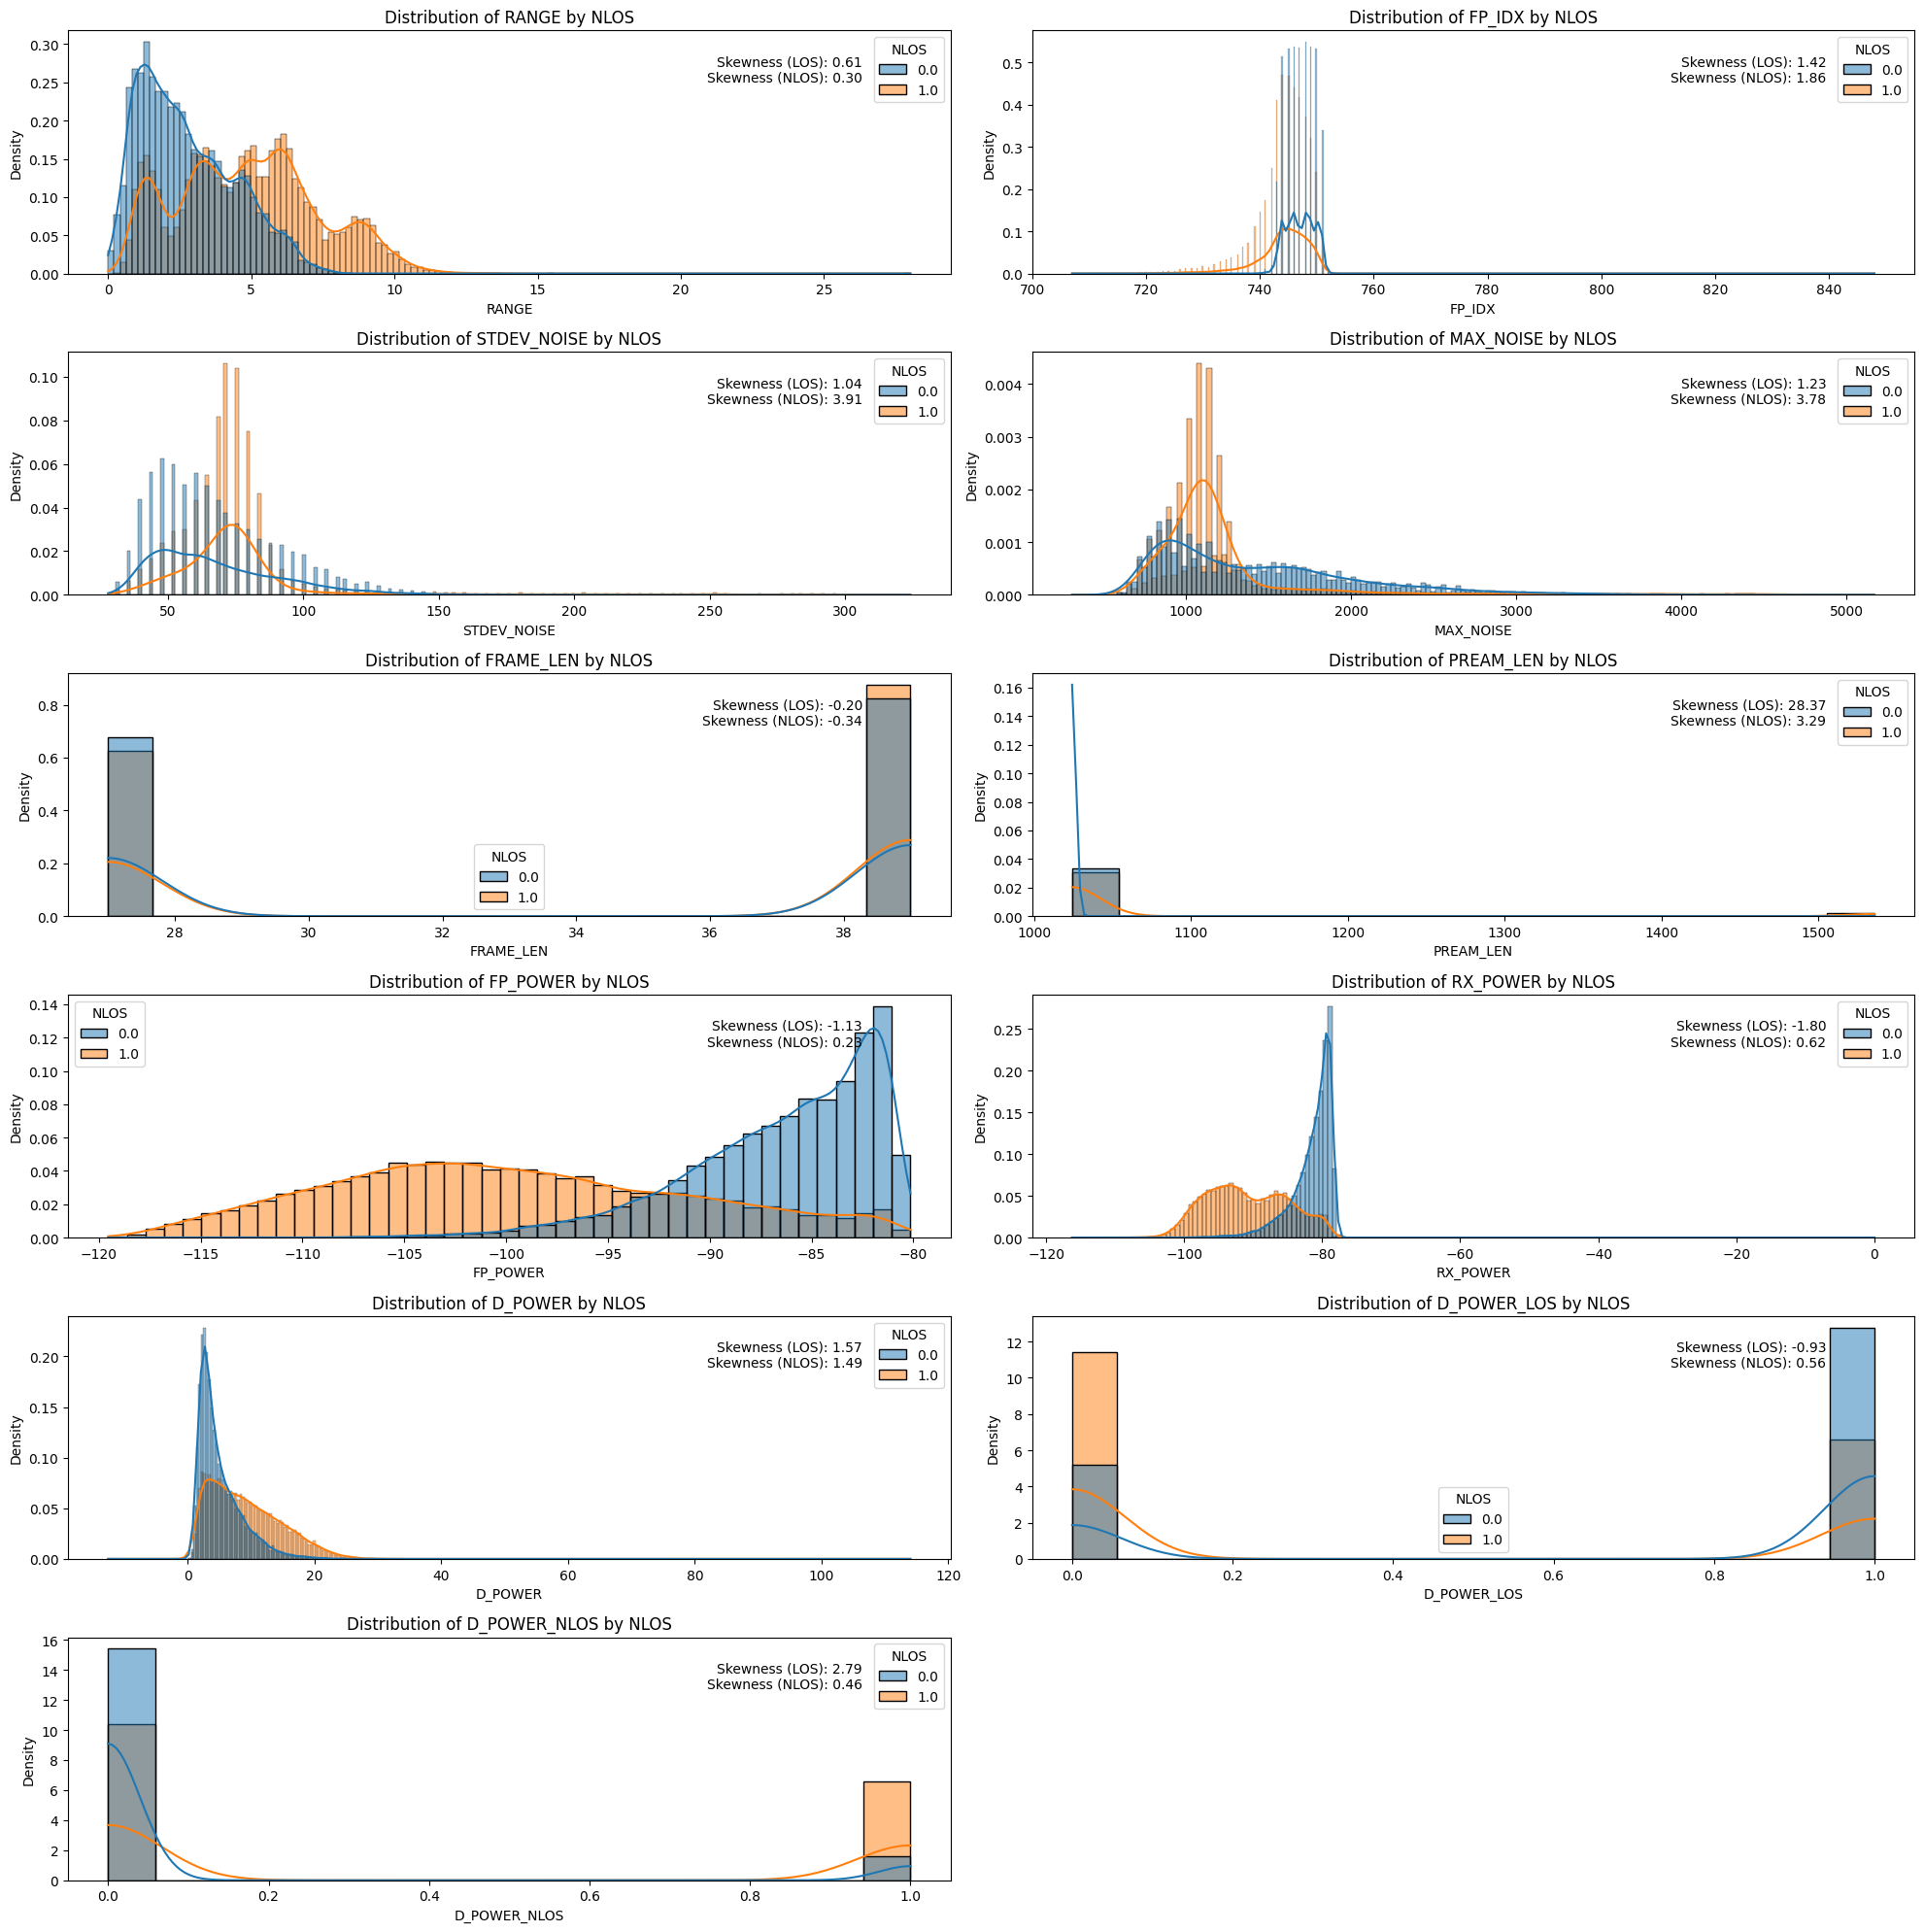

In [26]:
# Get non-class features
features = [i for i in df_non_cir.columns if i != 'NLOS']

# Plot histograms
print("Histograms for unscaled non-CIR dataset")
plot_histogram(df_non_cir, features)

#### Non-CIR Dataset (Min-Max scaled) histograms

Histograms for Min-Max scaled non-CIR dataset


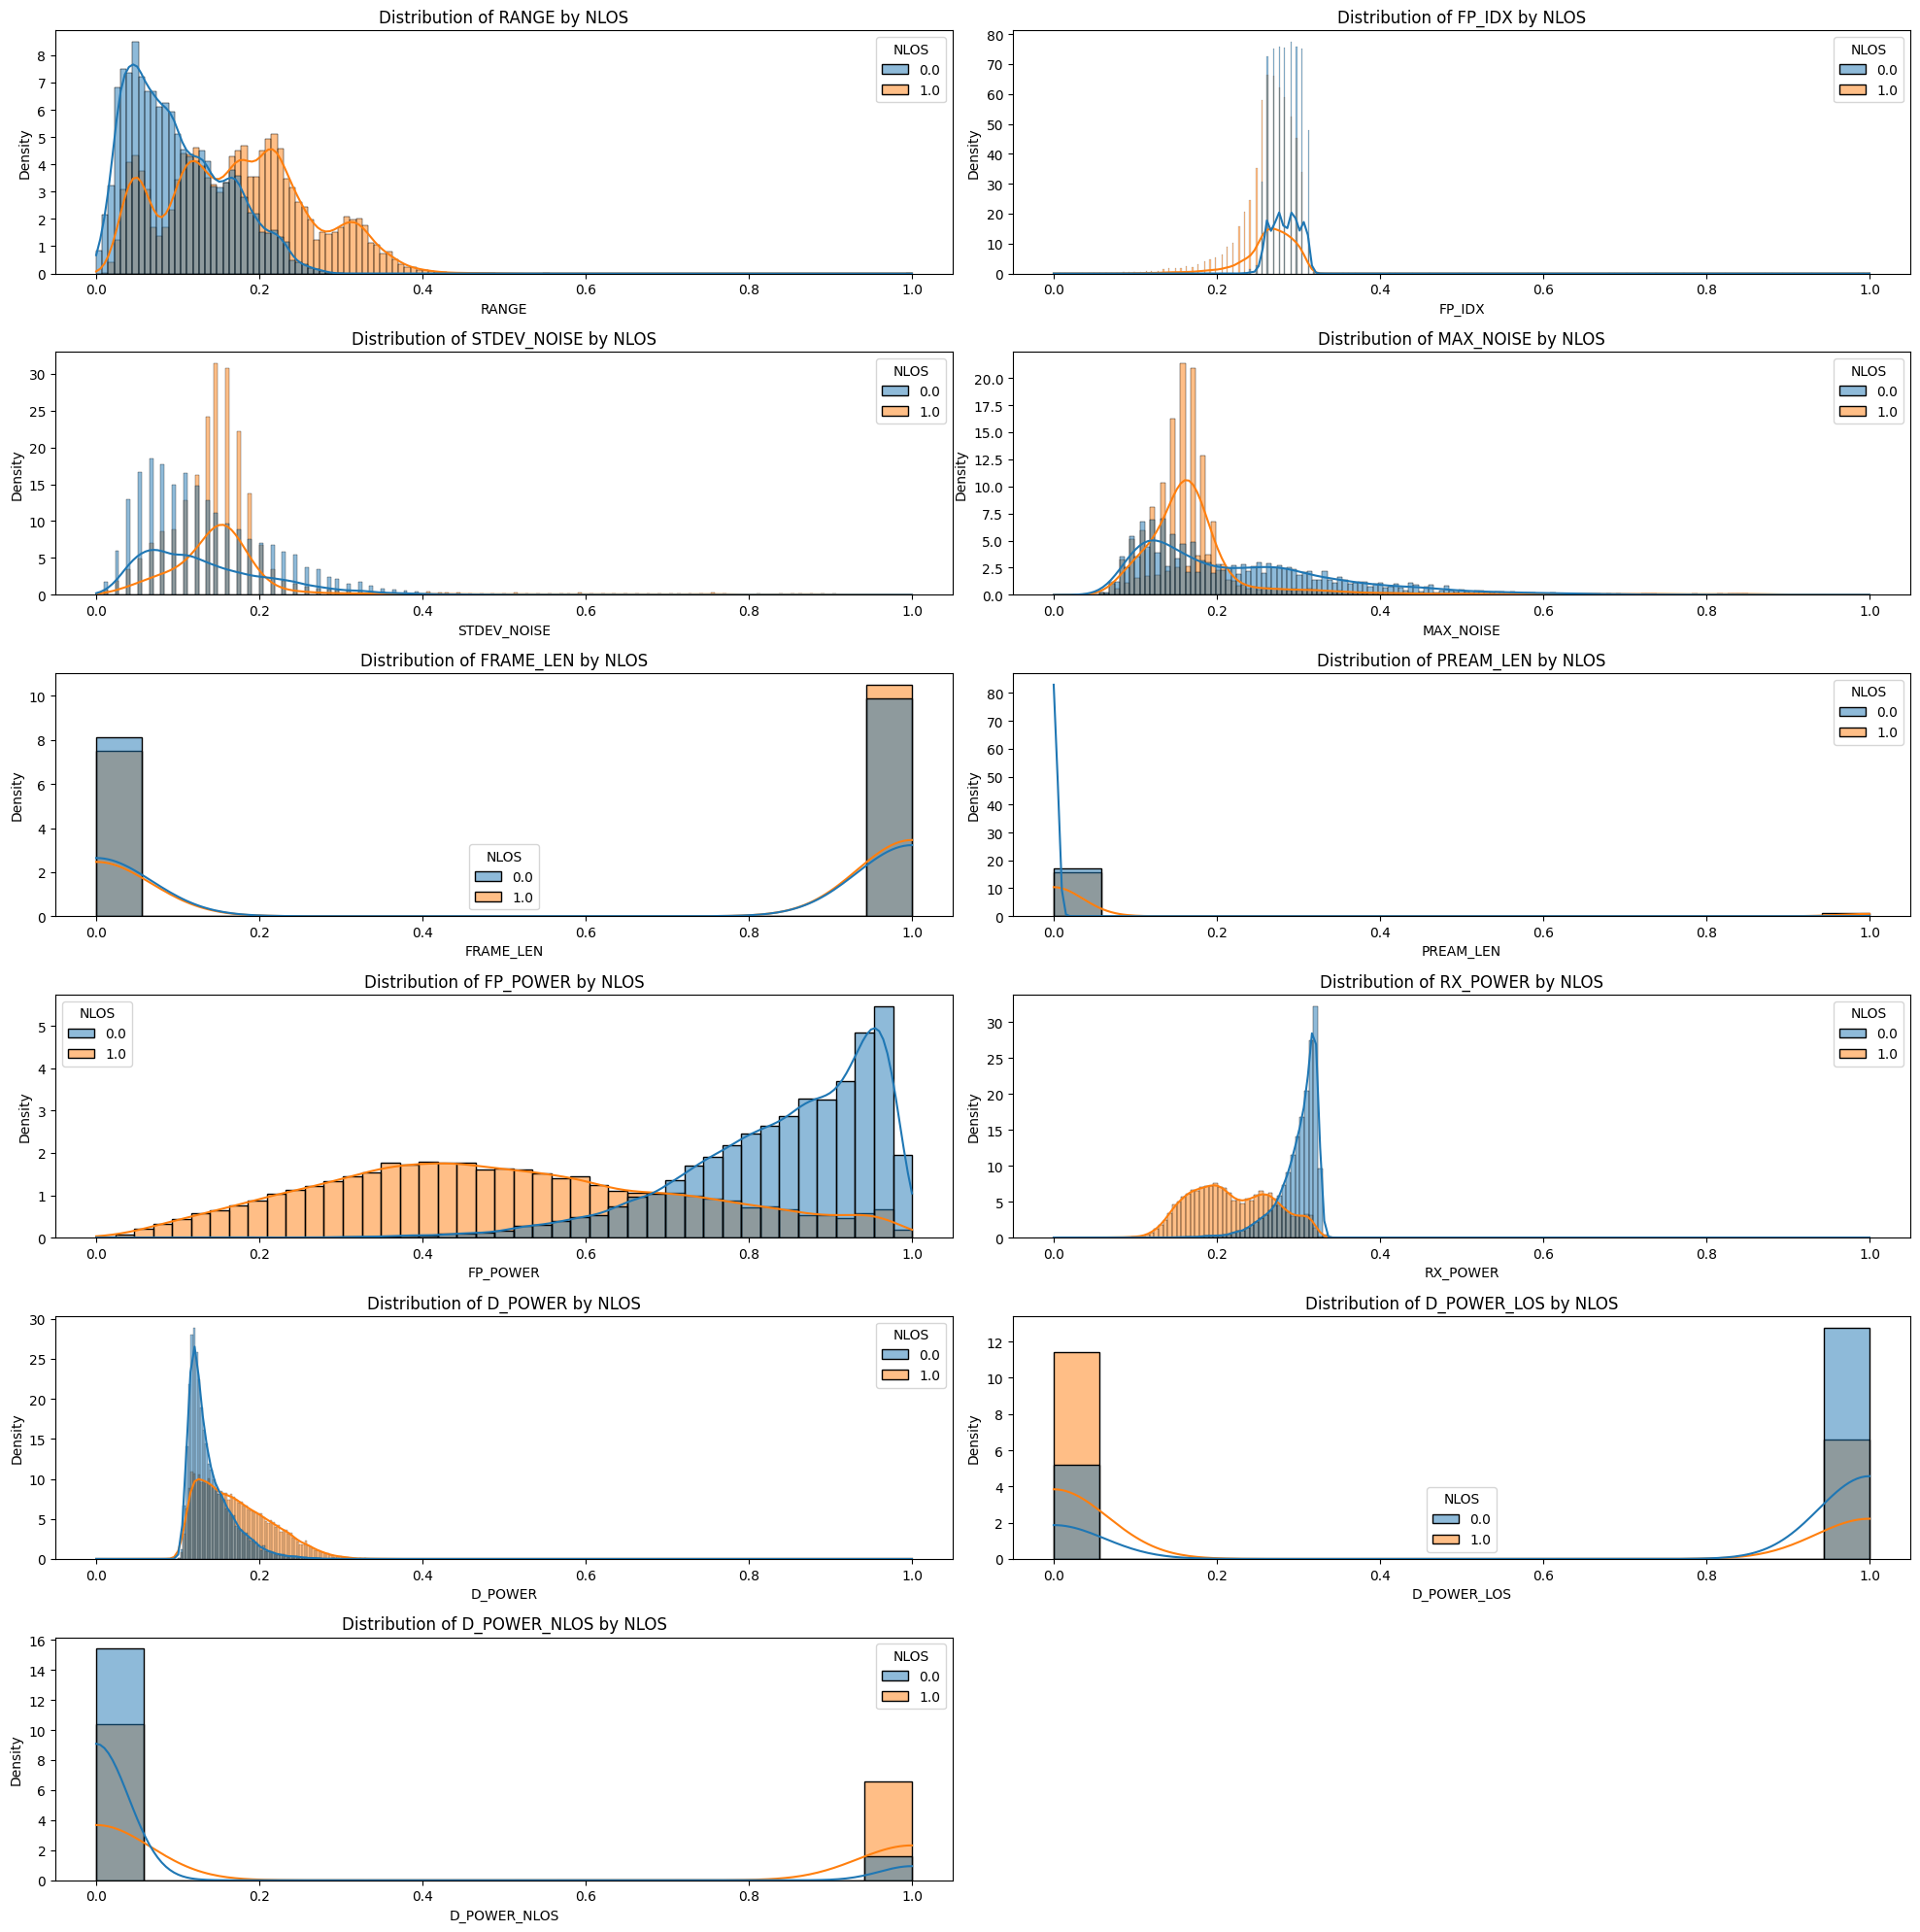

In [20]:
# Get non-class features
features = [i for i in df_non_cir_mm_scaled.columns if i != 'NLOS']

# Plot histograms
print("Histograms for Min-Max scaled non-CIR dataset")
plot_histogram(df_non_cir_mm_scaled, features)

#### Non-CIR Dataset (Standard scaled) histograms

Histograms for Standard scaled non-CIR dataset


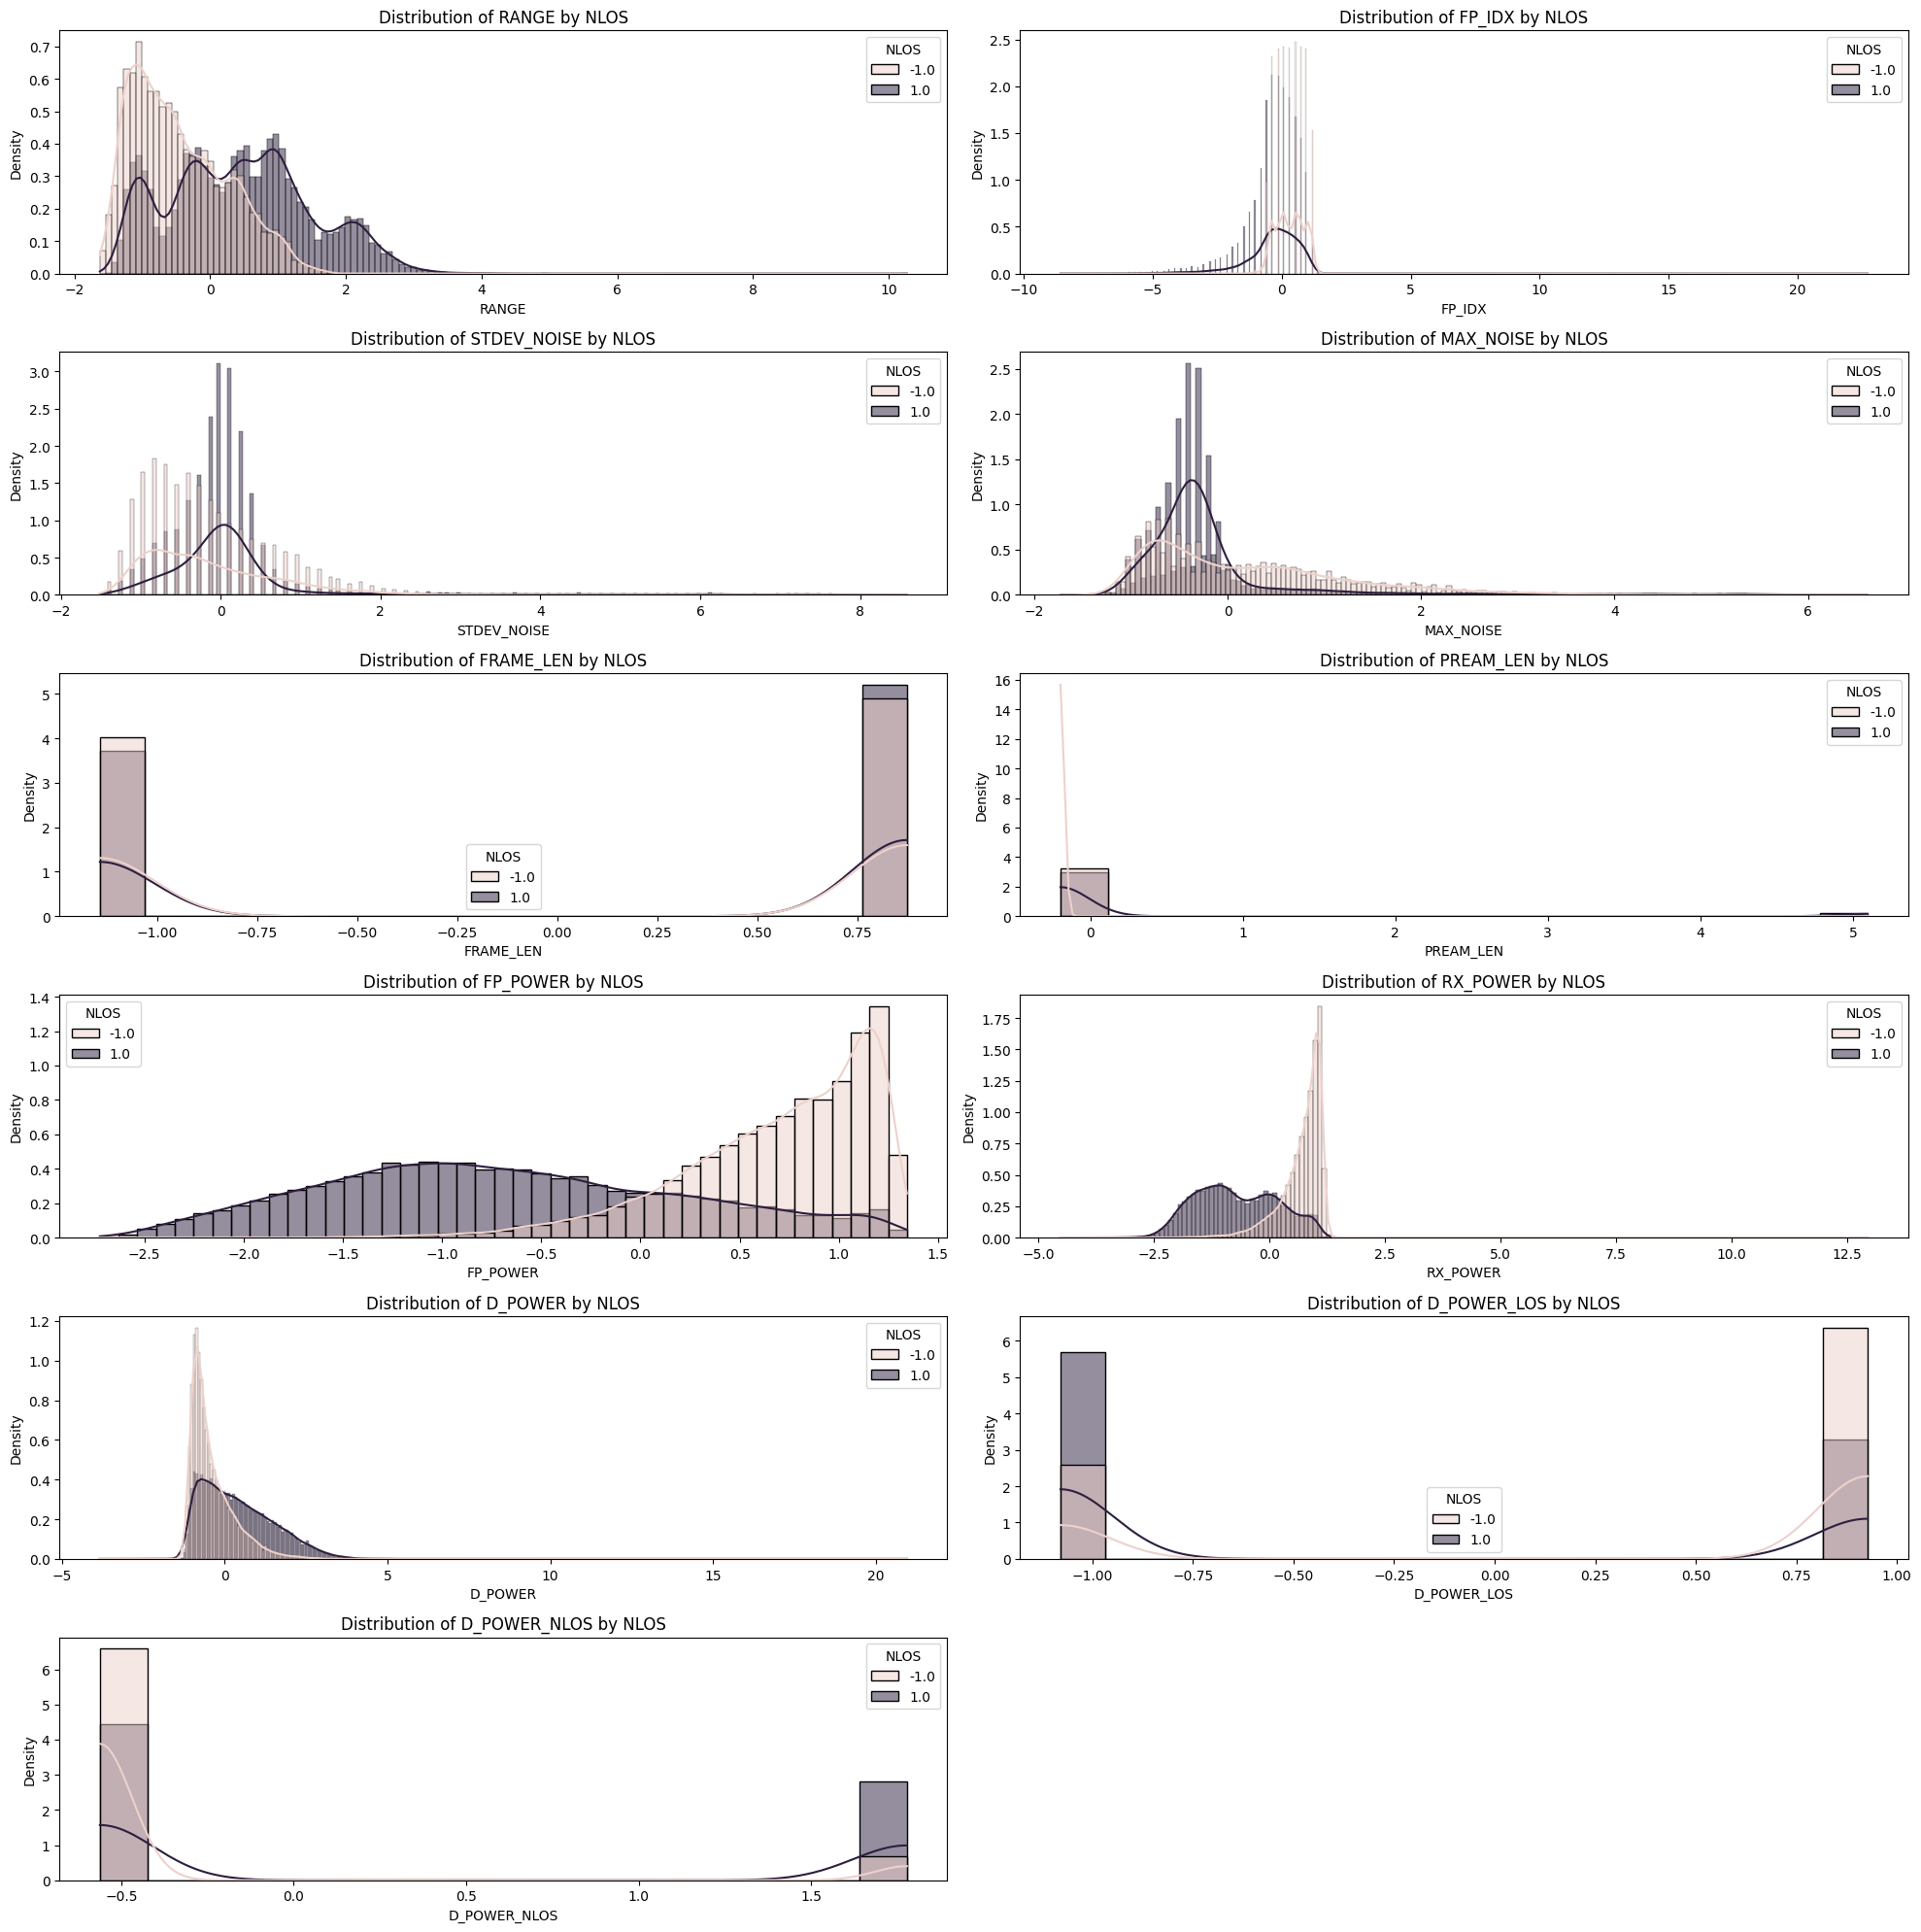

In [21]:
# Get non-class features
features = [i for i in df_non_cir_standard_scaled.columns if i != 'NLOS']

# Plot histograms
print("Histograms for Standard scaled non-CIR dataset")
plot_histogram(df_non_cir_standard_scaled, features)

In [23]:
df_non_cir

,NLOS,RANGE,FP_IDX,STDEV_NOISE,MAX_NOISE,FRAME_LEN,PREAM_LEN,FP_POWER,RX_POWER,D_POWER,D_POWER_LOS,D_POWER_NLOS
0,0.0,4.88,744.0,108.0,1645.0,27.0,1024.0,-94.596003,-83.242593,11.353411,0,1
1,0.0,0.97,746.0,48.0,1189.0,27.0,1024.0,-82.200844,-78.924940,3.275904,1,0
2,0.0,1.07,745.0,116.0,3111.0,39.0,1024.0,-81.821606,-78.433506,3.388100,1,0
3,0.0,0.90,751.0,60.0,1414.0,39.0,1024.0,-82.833613,-78.878945,3.954668,1,0
4,0.0,2.79,744.0,44.0,743.0,27.0,1024.0,-86.455578,-82.764816,3.690762,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,80.0,1188.0,39.0,1024.0,-109.446217,-94.681363,14.764854,0,1
41996,1.0,2.25,744.0,204.0,3126.0,39.0,1024.0,-103.265570,-88.436032,14.829538,0,1
41997,0.0,2.48,750.0,72.0,1068.0,27.0,1024.0,-93.474549,-81.707347,11.767202,0,1
41998,1.0,6.87,738.0,72.0,1071.0,39.0,1024.0,-114.306118,-87.757599,26.548519,0,1


In [ ]:
# Add some metrics to compute threshold to determine variability of skewness for classification
pass

Correlation Matrix against features excluding the individual CIR data, drop those above 0.7 or under -0.7

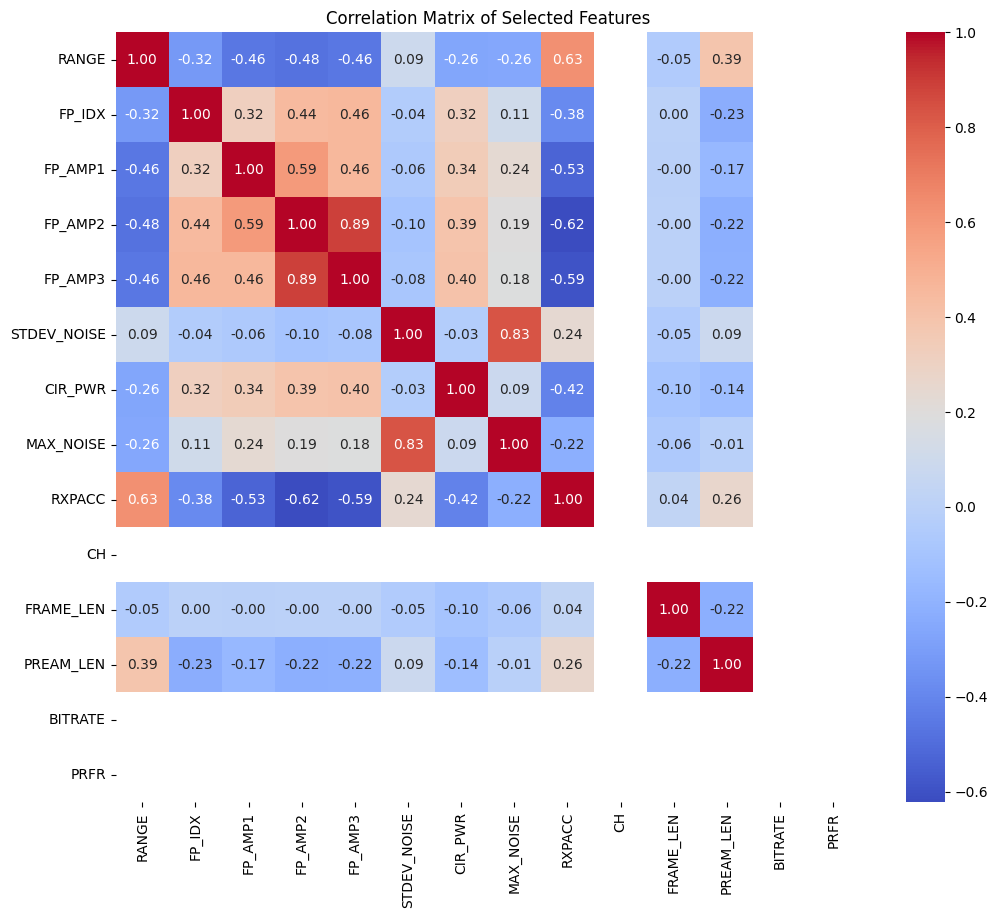

Pairs of features with high correlation coefficients:
FP_AMP2 - FP_AMP3: 0.89
STDEV_NOISE - MAX_NOISE: 0.83


In [ ]:
corr_df = df_non_cir.drop(columns='NLOS')
correlation_matrix = corr_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Find pairs of features with high correlation coefficients
threshold = 0.8  # Set a threshold for high correlation
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print("Pairs of features with high correlation coefficients:")
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")
else:
    print("No pairs of features with high correlation coefficients found.")

Decision Tree to identify which feature is important

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df_non_cir.drop(columns='NLOS')
y = df_non_cir['NLOS']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame based on feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 20 most important features
feature_importance_df

,Feature,Importance
8,RXPACC,0.302282
6,CIR_PWR,0.145000
0,RANGE,0.144434
4,FP_AMP3,0.089837
7,MAX_NOISE,0.084747
3,FP_AMP2,0.080345
2,FP_AMP1,0.065584
5,STDEV_NOISE,0.050225
1,FP_IDX,0.030547
10,FRAME_LEN,0.005793


As seen from the df also, the CH, bitrate, PRFR, FRAME_LEN, PREAM_LEN are close to a common constant and thus also no feature importance of it. FP_IDX prove to be of low imporatance too.

#### We can now either drop all those unimportant or do feature engineering

In [ ]:
# Drop
df_non_cir_trimmed = df_non_cir.drop(['CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR'], axis=1)

df_non_cir_trimmed

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0
...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0


##### Drop all that is used for transformation. And drop all those that has low importance.

In [ ]:
no_cir_df_transform = no_cir_df_rxsignal_cleaned.drop(['FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'RXPACC', 'CIR_PWR', 'CH', 'FRAME_LEN', 'PREAM_LEN', 'BITRATE', 'PRFR'], axis=1)

no_cir_df_transform

,NLOS,RANGE,FP_IDX,STDEV_NOISE,MAX_NOISE,FP_POWER_LEVEL,RX_LEVEL
0,0.0,4.88,744.0,108.0,1645.0,-94.596003,-83.242593
1,0.0,0.97,746.0,48.0,1189.0,-82.200844,-78.924940
2,0.0,1.07,745.0,116.0,3111.0,-81.821606,-78.433506
3,0.0,0.90,751.0,60.0,1414.0,-82.833613,-78.878945
4,0.0,2.79,744.0,44.0,743.0,-86.455578,-82.764816
...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,80.0,1188.0,-109.446217,-94.681363
41996,1.0,2.25,744.0,204.0,3126.0,-103.265570,-88.436032
41997,0.0,2.48,750.0,72.0,1068.0,-93.474549,-81.707347
41998,1.0,6.87,738.0,72.0,1071.0,-114.306118,-87.757599


First 15 feature we have made into two type of dataset.

df_non_cir_trimmed = Only unimportant is removed.


no_cir_df_transform = feature transformation and unimportant is removed

### Lets settle all the CIR data next

In [ ]:
# Get all the CIR Data
cir_df = df_combined_original.iloc[:, 15:]
cir_df

,CIR0,CIR1,CIR2,CIR3,CIR4,CIR5,CIR6,CIR7,CIR8,CIR9,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
0,733.0,363.0,497.0,618.0,387.0,703.0,536.0,321.0,298.0,156.0,...,408.0,713.0,446.0,273.0,340.0,494.0,378.0,546.0,30.0,256.0
1,71.0,206.0,182.0,277.0,252.0,336.0,259.0,305.0,120.0,185.0,...,224.0,31.0,62.0,267.0,102.0,359.0,156.0,132.0,79.0,0.0
2,348.0,293.0,334.0,336.0,246.0,186.0,475.0,197.0,447.0,103.0,...,250.0,419.0,311.0,185.0,274.0,258.0,212.0,305.0,56.0,256.0
3,151.0,177.0,496.0,193.0,200.0,298.0,117.0,251.0,308.0,308.0,...,318.0,191.0,58.0,276.0,249.0,298.0,64.0,100.0,112.0,0.0
4,127.0,81.0,340.0,134.0,297.0,269.0,291.0,201.0,207.0,189.0,...,272.0,129.0,264.0,77.0,104.0,313.0,234.0,74.0,165.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,173.0,60.0,216.0,348.0,384.0,182.0,96.0,252.0,271.0,100.0,...,198.0,335.0,291.0,138.0,176.0,224.0,210.0,205.0,289.0,0.0
41996,392.0,354.0,402.0,535.0,1146.0,283.0,972.0,562.0,117.0,466.0,...,1176.0,341.0,314.0,445.0,332.0,1000.0,1337.0,304.0,922.0,256.0
41997,309.0,295.0,242.0,301.0,187.0,144.0,118.0,171.0,291.0,80.0,...,219.0,246.0,71.0,374.0,183.0,16.0,160.0,266.0,269.0,256.0
41998,94.0,244.0,256.0,250.0,158.0,248.0,213.0,194.0,286.0,160.0,...,171.0,182.0,177.0,74.0,278.0,204.0,150.0,181.0,145.0,0.0


##### Lets try to aggregate the data method

In [ ]:
# AGGREGATION
######################
# Peak Value
new_cir_df = pd.DataFrame({'CIR_PEAK_VALUE': cir_df.max(axis=1)})

# Energy Sum
new_cir_df['CIR_ENERGY_SUM'] = cir_df.sum(axis=1)

# Early Energy Sum: Calculate the sum of the first N CIR measurements
N = 100
early_cir_df = cir_df.iloc[:, :N]
new_cir_df['CIR_EARLY_ENERGY'] = early_cir_df.sum(axis=1)


In [ ]:
# AGGREGATION
######################
# Mean Value
new_cir_df['CIR_MEAN'] = cir_df.mean(axis=1)    

# Variance
new_cir_df['CIR_VARIANCE'] = cir_df.var(axis=1)

# Skewness
new_cir_df['CIR_SKEWNESS'] = cir_df.skew(axis=1)

# Kurtosis
new_cir_df['CIR_KURTOSIS'] = cir_df.kurtosis(axis=1)

# Display the new features to verify

### Outlier Management

In [ ]:
# 29.0 is potentially an outlier value
df_combined_original['FRAME_LEN'].value_counts()

FRAME_LEN
39.0    23806
27.0    18193
29.0        1
Name: count, dtype: int64

Observe the data variation of the aggragated data against NLOS

CIR PEAK VALUE AND EARLY ENERGY

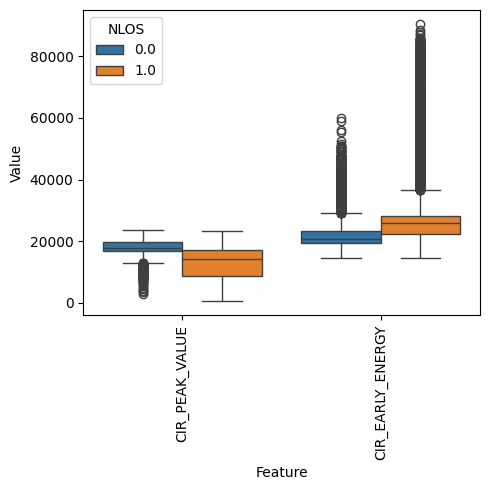

In [ ]:
temp_df = pd.concat([df_combined_original.iloc[:, :1], new_cir_df], axis=1).copy()
selected = temp_df[['NLOS','CIR_PEAK_VALUE','CIR_EARLY_ENERGY']]

df_melted = pd.melt(selected, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(5, 5))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

CIR MEAN AND KURTOSIS

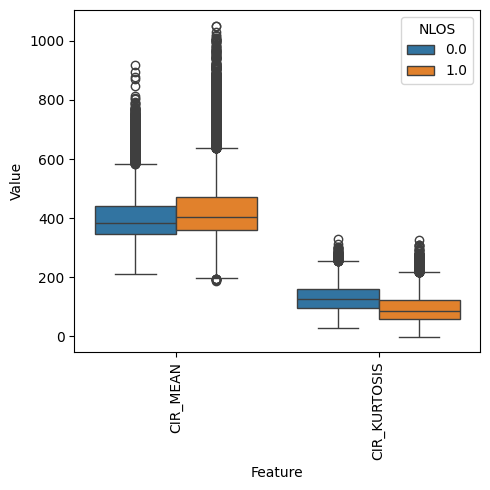

In [ ]:
temp_df = pd.concat([df_combined_original.iloc[:, :1], new_cir_df], axis=1).copy()
selected = temp_df[['NLOS','CIR_MEAN','CIR_KURTOSIS']]

df_melted = pd.melt(selected, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(5, 5))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

CIR SKEWNESS

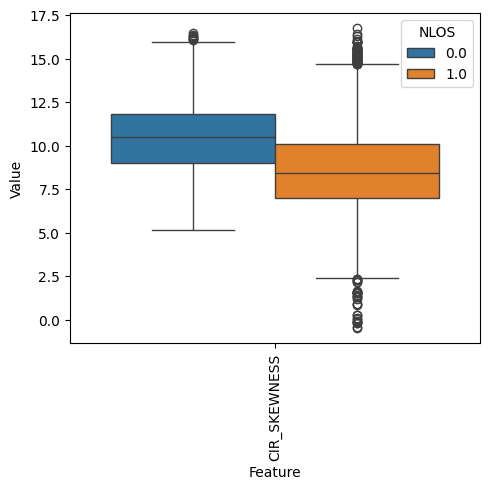

In [ ]:
temp_df = pd.concat([df_combined_original.iloc[:, :1], new_cir_df], axis=1).copy()
selected = temp_df[['NLOS','CIR_SKEWNESS']]

df_melted = pd.melt(selected, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(5, 5))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

CIR VARIANCE

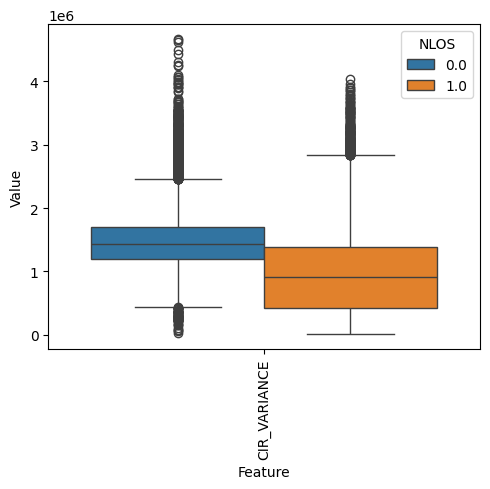

In [ ]:
temp_df = pd.concat([df_combined_original.iloc[:, :1], new_cir_df], axis=1).copy()
selected = temp_df[['NLOS','CIR_VARIANCE']]

df_melted = pd.melt(selected, id_vars='NLOS', var_name='Feature', value_name='Value')

plt.figure(figsize=(5, 5))
sns.boxplot(x='Feature', y='Value', hue='NLOS', data=df_melted)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Results Analysis

There are a fk ton of outliers visualised.

## Alternative -> Feature Engineering of the CIR datas

We try to calculate the eigen energy for the CIR Data Columns. To see how many number of components best explains close to 90% of the variance.

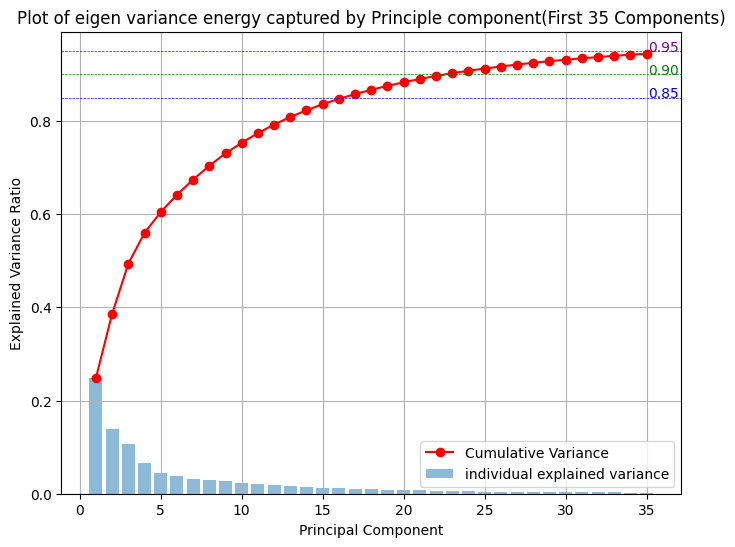

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Filter the dataset to only include the CIR columns and Class
temp_cir_df = cir_df

# Apply PCA
pca = PCA()
pca.fit(temp_cir_df)

# Calculate explained variance ratio (eigen energy)
eigen_energy = pca.explained_variance_ratio_[:35]  # Consider only the first 35 components
cumulative_variance = np.cumsum(eigen_energy)  # Cumulative explained variance

# Plot the explained variance ratio for the first 12 components
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigen_energy) + 1), eigen_energy, alpha=0.5, align='center', label=f'individual explained variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='red', marker='o', label='Cumulative Variance')

# Plot horizontal lines for specified thresholds
thresholds = [0.85, 0.90, 0.95]
threshold_colors = ['blue', 'green', 'purple']
for threshold, color in zip(thresholds, threshold_colors):
    plt.axhline(y=threshold, color=color, linestyle='--', linewidth=0.5)
    plt.text(len(cumulative_variance) + 0.1, threshold, f'{threshold:.2f}', color=color)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title(f"Plot of eigen variance energy captured by Principle component(First 35 Components)")
plt.legend()
plt.grid(True)
plt.show()

 _component = 25_ gives 90% accumulated variance. 

In [ ]:
# Apply PCA
pca = PCA(n_components=25)
cir_df_pca = pca.fit_transform(temp_cir_df)

# Create a DataFrame for the PCA-transformed features
pca_columns = [f'PC{i+1}' for i in range(25)]  
cir_df_pca = pd.DataFrame(cir_df_pca, columns=pca_columns)

cir_df_pca


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,7738.528211,19942.478391,4995.891830,-1340.228360,5763.008746,-3144.209225,6389.924054,-3687.755577,5087.298016,3802.098292,...,-5198.980369,699.789070,-4447.396363,-1197.639609,3803.310283,1020.110758,4745.923218,1457.384336,5581.530011,-543.870232
1,-7105.812164,10568.625466,-7949.056888,4158.447485,-3805.101452,1000.517734,-7223.862234,6766.025463,-4499.035938,-24.917248,...,745.754090,2122.729254,-726.826475,-464.418429,575.370713,-579.032869,345.296309,791.581819,144.271971,-331.276318
2,-12837.142861,8936.989875,4676.919974,7060.525585,2887.657951,-4531.759760,1363.312332,-4549.186021,-1919.909346,-7746.035979,...,917.912146,3317.755718,-2353.401082,3579.392196,1349.796952,476.028087,1947.015863,381.284428,-246.477956,2384.696052
3,17336.589502,-6443.440083,-308.666705,10722.763781,-6521.404163,2265.453165,2731.494576,1692.825854,-449.570124,4312.726735,...,-1452.860420,-1543.267313,-1917.972476,-1789.077884,-3555.778174,1006.731732,1836.484541,-1315.954496,-990.974071,-398.301172
4,-13136.913863,1951.557797,9579.321344,5000.480894,2010.541097,-7727.430351,-4031.315785,-4214.132270,-772.536669,6470.303999,...,-1730.263493,2056.952408,-4280.998665,1716.716547,1569.459187,-1917.152823,-1910.169858,999.248448,1195.939877,-458.562481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1736.656748,-8200.260406,-203.542244,-2302.734986,-5198.356251,-6979.088044,-2930.187272,-70.564260,2108.451682,-5476.856887,...,-2807.175160,-472.872225,200.946785,-473.447897,494.519852,-771.897498,-551.746511,-48.463820,-2371.371142,-673.317095
41996,8294.841759,-5642.536276,7022.526294,1423.188010,-4281.104405,-6919.871794,4768.693951,5853.180018,1878.904552,4638.679497,...,-1076.598718,-2630.748623,-73.766917,-1246.247137,7457.264963,4745.223824,649.697986,3134.178555,-1887.215042,242.296405
41997,34568.551885,6148.992572,28179.155465,-4393.361149,3515.419802,5258.179951,989.195026,3789.373213,5475.092606,-4217.547010,...,4400.376930,2582.945078,6552.406746,4258.137589,8608.657781,1691.477000,-8137.944746,-7610.604220,2395.223462,-4672.856868
41998,-11577.605775,7747.588981,12904.772521,-936.841589,-7536.663378,7849.035625,-2466.790691,7894.818335,-5554.131836,-585.565004,...,242.611433,470.523904,659.379851,-2587.430662,-5481.463361,1594.651433,1951.968305,-2937.855626,1565.029013,-395.405612


#### Results Analysis

With PCA, we aim to visualise all the CIR data, summarised into this 25 PC components. This reduce the variance of data caused by aggregation.

#### For all CIR data we have made into two type of dataset.

new_cir_df = CIR data combined into Mean, Variance, Skewness....



cir_df_pca = PCA of all the CIR data

### Lets combine all the data for training

1) First 15 re-engineered to get First Path Power level and Receive Signal Level. Second half re-engineered to the mean, variance

In [ ]:
from sklearn.preprocessing import StandardScaler

dataset_1 = pd.concat([no_cir_df_transform, new_cir_df], axis=1)
temp_df = dataset_1.copy()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(temp_df)

df_scaled = pd.DataFrame(scaled_features, columns=temp_df.columns)

df_scaled['NLOS'] = temp_df['NLOS'].values

# Export data
save_to_pickle("dataset_1", temp_df)

df_scaled.head()

,NLOS,RANGE,FP_IDX,STDEV_NOISE,MAX_NOISE,FP_POWER_LEVEL,RX_LEVEL,CIR_PEAK_VALUE,CIR_ENERGY_SUM,CIR_EARLY_ENERGY,CIR_MEAN,CIR_VARIANCE,CIR_SKEWNESS,CIR_KURTOSIS
0,0.0,0.445105,-0.367180,1.218119,0.564628,-0.149601,0.434310,1.204340,2.869312,2.594143,2.869312,2.508702,-0.890665,-0.931266
1,0.0,-1.214528,0.076804,-0.828409,-0.218351,1.130337,1.086912,0.265790,-0.772046,-0.781943,-0.772046,0.396802,0.415196,0.145728
2,0.0,-1.172082,-0.145188,1.490990,3.081836,1.169498,1.161191,0.443118,0.213299,0.016336,0.213299,0.460968,-0.113976,-0.259802
3,0.0,-1.244240,1.186764,-0.419104,0.167987,1.064997,1.093864,0.508552,-0.637949,-0.725730,-0.637949,0.461018,0.416940,0.173663
4,0.0,-0.442014,-0.367180,-0.964845,-0.984159,0.690988,0.506525,0.438537,-0.602311,-0.876871,-0.602311,0.091102,0.078818,-0.064380


2) First 15 re-engineered to get First Path Power level and Recieve Signal Level. Second half is the PCA of the CIR Data

In [ ]:
dataset_2 = pd.concat([no_cir_df_transform, cir_df_pca], axis=1)
save_to_pickle("dataset_2", dataset_2)
dataset_2

,NLOS,RANGE,FP_IDX,STDEV_NOISE,MAX_NOISE,FP_POWER_LEVEL,RX_LEVEL,PC1,PC2,PC3,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,0.0,4.88,744.0,108.0,1645.0,-94.596003,-83.242593,7738.528211,19942.478391,4995.891830,...,-5198.980369,699.789070,-4447.396363,-1197.639609,3803.310283,1020.110758,4745.923218,1457.384336,5581.530011,-543.870232
1,0.0,0.97,746.0,48.0,1189.0,-82.200844,-78.924940,-7105.812164,10568.625466,-7949.056888,...,745.754090,2122.729254,-726.826475,-464.418429,575.370713,-579.032869,345.296309,791.581819,144.271971,-331.276318
2,0.0,1.07,745.0,116.0,3111.0,-81.821606,-78.433506,-12837.142861,8936.989875,4676.919974,...,917.912146,3317.755718,-2353.401082,3579.392196,1349.796952,476.028087,1947.015863,381.284428,-246.477956,2384.696052
3,0.0,0.90,751.0,60.0,1414.0,-82.833613,-78.878945,17336.589502,-6443.440083,-308.666705,...,-1452.860420,-1543.267313,-1917.972476,-1789.077884,-3555.778174,1006.731732,1836.484541,-1315.954496,-990.974071,-398.301172
4,0.0,2.79,744.0,44.0,743.0,-86.455578,-82.764816,-13136.913863,1951.557797,9579.321344,...,-1730.263493,2056.952408,-4280.998665,1716.716547,1569.459187,-1917.152823,-1910.169858,999.248448,1195.939877,-458.562481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41998,1.0,6.87,738.0,72.0,1071.0,-114.306118,-87.757599,-11577.605775,7747.588981,12904.772521,...,242.611433,470.523904,659.379851,-2587.430662,-5481.463361,1594.651433,1951.968305,-2937.855626,1565.029013,-395.405612
41999,1.0,6.02,742.0,68.0,1028.0,-107.508017,-100.916635,-10577.758490,-17196.581071,2115.683655,...,23.306553,1149.657619,163.021037,-378.469542,-3.464635,-760.080636,57.978593,368.855000,-601.505770,772.742110
2261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10308.170106,-24466.048651,-3265.836348,...,277.544733,1235.923119,-696.051594,1121.475492,-988.931349,-1872.458477,-1023.734352,-454.484620,521.677455,-250.748625
16288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10186.828938,-24863.636587,-3263.285979,...,351.627460,1128.403941,-1115.038514,1106.892474,-876.906980,-1786.376975,-1045.455972,-500.010306,318.496394,-371.687293


3) First 15, drop all unimportant features. Second half re-engineered to the mean, variance

In [ ]:
dataset_3 = pd.concat([df_non_cir_trimmed, new_cir_df], axis=1)
temp_df = dataset_3.copy()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(temp_df)

df_scaled = pd.DataFrame(scaled_features, columns=temp_df.columns)

df_scaled['NLOS'] = temp_df['NLOS'].values

df_scaled.head()
save_to_pickle("dataset_3", temp_df)
dataset_3

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CIR_PEAK_VALUE,CIR_ENERGY_SUM,CIR_EARLY_ENERGY,CIR_MEAN,CIR_VARIANCE,CIR_SKEWNESS,CIR_KURTOSIS
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,21328.0,690693.0,43361.0,679.815945,2.791582e+06,7.548897,66.833927
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,17025.0,350447.0,18857.0,344.928150,1.485065e+06,10.453308,119.222133
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,17838.0,442517.0,24651.0,435.548228,1.524761e+06,9.276358,99.495962
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,18138.0,362977.0,19265.0,357.260827,1.524792e+06,10.457185,120.581015
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,17817.0,366307.0,18168.0,360.538386,1.295946e+06,9.705158,109.001843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,11609.0,385449.0,25625.0,379.378937,5.612658e+05,9.793655,117.900486
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,17403.0,725497.0,54913.0,714.071850,9.891505e+05,9.107614,115.730667
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,19373.0,750502.0,20956.0,738.683071,4.666633e+06,5.556110,33.264859
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,22619.0,487767.0,21050.0,480.085630,1.540242e+06,10.109507,139.096338


 3) First 15, drop all unimportant features. Second half is the PCA of the CIR Data

In [ ]:
dataset_4 = pd.concat([df_non_cir_trimmed, cir_df_pca], axis=1)
save_to_pickle("dataset_4", dataset_4)
dataset_4

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,0.0,4.88,744.0,3361.0,11729.0,8528.0,108.0,23088.0,1645.0,654.0,...,-5198.980369,699.789070,-4447.396363,-1197.639609,3803.310283,1020.110758,4745.923218,1457.384336,5581.530011,-543.870232
1,0.0,0.97,746.0,16105.0,17366.0,12005.0,48.0,11437.0,1189.0,280.0,...,745.754090,2122.729254,-726.826475,-464.418429,575.370713,-579.032869,345.296309,791.581819,144.271971,-331.276318
2,0.0,1.07,745.0,4106.0,18428.0,18666.0,116.0,11733.0,3111.0,268.0,...,917.912146,3317.755718,-2353.401082,3579.392196,1349.796952,476.028087,1947.015863,381.284428,-246.477956,2384.696052
3,0.0,0.90,751.0,14242.0,12346.0,17667.0,60.0,12657.0,1414.0,293.0,...,-1452.860420,-1543.267313,-1917.972476,-1789.077884,-3555.778174,1006.731732,1836.484541,-1315.954496,-990.974071,-398.301172
4,0.0,2.79,744.0,10209.0,16889.0,13654.0,44.0,10278.0,743.0,413.0,...,-1730.263493,2056.952408,-4280.998665,1716.716547,1569.459187,-1917.152823,-1910.169858,999.248448,1195.939877,-458.562481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,1.0,4.25,745.0,1020.0,3480.0,2152.0,80.0,4064.0,1188.0,1024.0,...,-2807.175160,-472.872225,200.946785,-473.447897,494.519852,-771.897498,-551.746511,-48.463820,-2371.371142,-673.317095
41996,1.0,2.25,744.0,1499.0,4062.0,3571.0,204.0,7307.0,3126.0,669.0,...,-1076.598718,-2630.748623,-73.766917,-1246.247137,7457.264963,4745.223824,649.697986,3134.178555,-1887.215042,242.296405
41997,0.0,2.48,750.0,12766.0,10939.0,6430.0,72.0,37130.0,1068.0,695.0,...,4400.376930,2582.945078,6552.406746,4258.137589,8608.657781,1691.477000,-8137.944746,-7610.604220,2395.223462,-4672.856868
41998,1.0,6.87,738.0,727.0,1515.0,890.0,72.0,12461.0,1071.0,808.0,...,242.611433,470.523904,659.379851,-2587.430662,-5481.463361,1594.651433,1951.968305,-2937.855626,1565.029013,-395.405612
